In [ ]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np
import random
import pandas as pd

In [ ]:
class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        #Maybe change this structure to add the subgroup
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 1
        for node in self.graph.nodes:
            #All nodes have opinion 1 to represent true fact
            #Start at 0.5 and introduce truth later
            #See how timing of adding truth affects the model
            self.graph.nodes[node]['opinion'] = np.random.normal(0.5, 0.15)
            self.graph.nodes[node]['persuasiveness'] = np.random.normal(1.2, 0.2)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0
        self.average = 0
        self.sd = 0
        self.avgArr = []
        self.arrSteps = []
        self.data = []
        self.dataSteps = []

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step) + '   Avg Opinion: ' + str(self.average) + "   Opinion SD: " + str(self.sd))

    def update(self):
        #Add fake news when steps = 2000
        if self.step == 1:
            for i in range(1):
                randNum = random.randint(0, 49)
                self.graph.nodes[randNum]['opinion'] = 1  
        #if self.step == 400:
            #randomeNode = random.randint(0, 50)
            #Fact can't be the same node as false news
            #while randomeNode == randNum: 
                #randomeNode = random.randint(0, 50)
            #self.graph.nodes[randomeNode]['opinion'] = 1
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            average = 0
            node = 0
            arr = []
            data = []
            # Select a random edge and update node opinions and edge weight
            #Run and update every node/edge
            for x in self.graph.edges:
                opinions = [self.graph.nodes[n]['opinion'] for n in x]
                persuade = [self.graph.nodes[n]['persuasiveness'] for n in x]
                for i in [0, 1]:
                    #Don;t change fake news and fact opinion
                    if opinions[i] != 0 and opinions[i] != 1:
                        self.graph.nodes[x[i]]['opinion'] = (
                            opinions[i] + self.alpha * persuade[1-i] * (opinions[1-i] - opinions[i]))
                    average+=opinions[i]
                    arr.append(opinions[i])
                    data.append(opinions[i])
                    node += 1
            self.average = average/node
            self.sd = np.std(arr)
            if(self.step%100 == 0):
                self.avgArr.append(self.average)
                self.arrSteps.append(self.step)
            if(self.step%25 == 0):
                self.data.append(data)
                self.dataSteps.append(self.step)
        self.step += 1
#Choose nodes with highest connection or choose the nodes with highest persuasiveness or choose multiple random nodes

In [ ]:
class SocialDynamicsSimulation3:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        #Maybe change this structure to add the subgroup
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 1
        for node in self.graph.nodes:
            #All nodes have opinion 1 to represent true fact
            #Start at 0.5 and introduce truth later
            #See how timing of adding truth affects the model
            self.graph.nodes[node]['opinion'] = np.random.normal(0.5, 0.15)
            self.graph.nodes[node]['persuasiveness'] = np.random.normal(1.2, 0.2)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0
        self.average = 0
        self.sd = 0
        self.avgArr = []
        self.arrSteps = []
        self.data = []
        self.dataSteps = []

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step) + '   Avg Opinion: ' + str(self.average) + "   Opinion SD: " + str(self.sd))

    def update(self):
        #Add fake news when steps = 2000
        if self.step == 1:
            for i in range(3):
                randNum = random.randint(0, 49)
                self.graph.nodes[randNum]['opinion'] = 1  
        #if self.step == 400:
            #randomeNode = random.randint(0, 50)
            #Fact can't be the same node as false news
            #while randomeNode == randNum: 
                #randomeNode = random.randint(0, 50)
            #self.graph.nodes[randomeNode]['opinion'] = 1
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            average = 0
            node = 0
            arr = []
            data = []
            # Select a random edge and update node opinions and edge weight
            #Run and update every node/edge
            for x in self.graph.edges:
                opinions = [self.graph.nodes[n]['opinion'] for n in x]
                persuade = [self.graph.nodes[n]['persuasiveness'] for n in x]
                for i in [0, 1]:
                    #Don;t change fake news and fact opinion
                    if opinions[i] != 0 and opinions[i] != 1:
                        self.graph.nodes[x[i]]['opinion'] = (
                            opinions[i] + self.alpha * persuade[1-i] * (opinions[1-i] - opinions[i]))
                    average+=opinions[i]
                    arr.append(opinions[i])
                    data.append(opinions[i])
                    node += 1
            self.average = average/node
            self.sd = np.std(arr)
            if(self.step%100 == 0):
                self.avgArr.append(self.average)
                self.arrSteps.append(self.step)
            if(self.step%25 == 0):
                self.data.append(data)
                self.dataSteps.append(self.step)
        self.step += 1
#Choose nodes with highest connection or choose the nodes with highest persuasiveness or choose multiple random nodes

In [ ]:
class SocialDynamicsSimulation5:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        #Maybe change this structure to add the subgroup
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 1
        for node in self.graph.nodes:
            #All nodes have opinion 1 to represent true fact
            #Start at 0.5 and introduce truth later
            #See how timing of adding truth affects the model
            self.graph.nodes[node]['opinion'] = np.random.normal(0.5, 0.15)
            self.graph.nodes[node]['persuasiveness'] = np.random.normal(1.2, 0.2)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0
        self.average = 0
        self.sd = 0
        self.avgArr = []
        self.arrSteps = []
        self.data = []
        self.dataSteps = []

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step) + '   Avg Opinion: ' + str(self.average) + "   Opinion SD: " + str(self.sd))

    def update(self):
        #Add fake news when steps = 2000
        if self.step == 1:
            for i in range(5):
                randNum = random.randint(0, 49)
                self.graph.nodes[randNum]['opinion'] = 1  
        #if self.step == 400:
            #randomeNode = random.randint(0, 50)
            #Fact can't be the same node as false news
            #while randomeNode == randNum: 
                #randomeNode = random.randint(0, 50)
            #self.graph.nodes[randomeNode]['opinion'] = 1
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            average = 0
            node = 0
            arr = []
            data = []
            # Select a random edge and update node opinions and edge weight
            #Run and update every node/edge
            for x in self.graph.edges:
                opinions = [self.graph.nodes[n]['opinion'] for n in x]
                persuade = [self.graph.nodes[n]['persuasiveness'] for n in x]
                for i in [0, 1]:
                    #Don;t change fake news and fact opinion
                    if opinions[i] != 0 and opinions[i] != 1:
                        self.graph.nodes[x[i]]['opinion'] = (
                            opinions[i] + self.alpha * persuade[1-i] * (opinions[1-i] - opinions[i]))
                    average+=opinions[i]
                    arr.append(opinions[i])
                    data.append(opinions[i])
                    node += 1
            self.average = average/node
            self.sd = np.std(arr)
            if(self.step%100 == 0):
                self.avgArr.append(self.average)
                self.arrSteps.append(self.step)
            if(self.step%25 == 0):
                self.data.append(data)
                self.dataSteps.append(self.step)
        self.step += 1
#Choose nodes with highest connection or choose the nodes with highest persuasiveness or choose multiple random nodes

In [ ]:
sim = SocialDynamicsSimulation()
sim.initialize()

avgP=[]
mean=[]
lowIndex=[]
highIndex=[]
for i in range(100):
    for j in range(10):
        for k in range(100):
            sim.update()
    avgP.append(sim.avgArr)
    sim.initialize()

In [ ]:
#convert avgP (python list) into pandas dataframe (library)
df = pd.DataFrame(avgP, columns = ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000'])
#use pandas' to_csv function to write the dataframe into a csv file
for i in ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000']:
    mean.append(df[i].mean())
    lowIndex.append(df[i].quantile(0.025))
    highIndex.append(df[i].quantile(0.975))

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df.to_csv('/content/drive/MyDrive/test_csv_file.csv')
#with open('/drive/MyDrive/', 'w', encoding = 'utf-8-sig') as f:
 # df.to_csv(f)

In [ ]:
df=pd.read_csv('drive/MyDrive/test_csv_file.csv')
mean=[]
lowIndex=[]
highIndex=[]
for i in ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000']:
    mean.append(df[i].mean())
    lowIndex.append(df[i].quantile(0.025))
    highIndex.append(df[i].quantile(0.975))

In [ ]:
sim3 = SocialDynamicsSimulation3()
sim3.initialize()
avgP3=[]
mean3=[]
lowIndex3=[]
highIndex3=[]
for i in range(100):
    for j in range(10):
        for k in range(100):
            sim3.update()
    avgP3.append(sim3.avgArr)
    sim3.initialize()

#convert avgP (python list) into pandas dataframe (library)
df3 = pd.DataFrame(avgP3, columns = ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000'])
#use pandas' to_csv function to write the dataframe into a csv file
for i in ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000']:
    mean3.append(df3[i].mean())
    lowIndex3.append(df3[i].quantile(0.025))
    highIndex3.append(df3[i].quantile(0.975))

In [ ]:
df3.to_csv('/content/drive/MyDrive/test2_csv_file.csv')

In [ ]:
df3=pd.read_csv('drive/MyDrive/test2_csv_file.csv')
mean3=[]
lowIndex3=[]
highIndex3=[]
for i in ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000']:
    mean3.append(df3[i].mean())
    lowIndex3.append(df3[i].quantile(0.025))
    highIndex3.append(df3[i].quantile(0.975))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
sim5 = SocialDynamicsSimulation5()
sim5.initialize()
avgP5=[]
mean5=[]
lowIndex5=[]
highIndex5=[]

for i in range(100):
    for j in range(10):
        for k in range(100):
            sim5.update()
    avgP5.append(sim5.avgArr)
    sim5.initialize()

#convert avgP (python list) into pandas dataframe (library)
df5 = pd.DataFrame(avgP5, columns = ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000'])
#use pandas' to_csv function to write the dataframe into a csv file
for i in ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000']:
    mean5.append(df5[i].mean())
    lowIndex5.append(df5[i].quantile(0.025))
    highIndex5.append(df5[i].quantile(0.975))

In [ ]:
df5.to_csv('/content/drive/MyDrive/test3_csv_file.csv')

In [ ]:
df5=pd.read_csv('drive/MyDrive/test3_csv_file.csv')
mean5=[]
lowIndex5=[]
highIndex5=[]
for i in ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000']:
    mean5.append(df5[i].mean())
    lowIndex5.append(df5[i].quantile(0.025))
    highIndex5.append(df5[i].quantile(0.975))

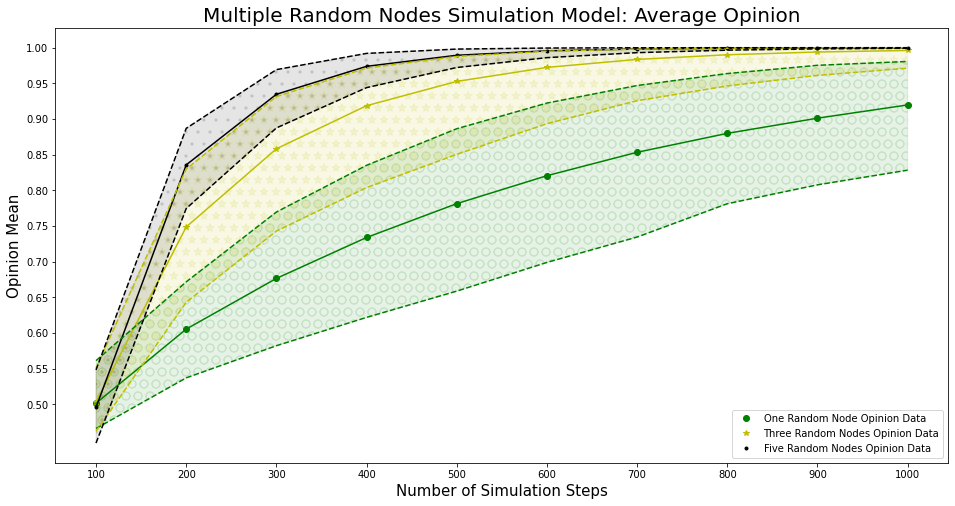

One Random Node Area = 6.962863778773258
Three Random Node Area = 8.168170004511525
Five Random Node Area = 8.474014403858503


In [ ]:
#Plots the mean opinion
plt.figure(figsize=(16,8))
#plt.title("Five Random Nodes Simulation Model: Average Opinion")
plt.title("Multiple Random Nodes Simulation Model: Average Opinion", fontsize=20)
plt.xlabel("Number of Simulation Steps", fontsize=15)
plt.ylabel("Opinion Mean", fontsize=15)
plt.yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1])
plt.xticks([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
#97.5% and 2.5% percentile

#All markers: ['.','o','v','^','>','<','s','p','*','h','H','D','d','1','',''] 
#https://www.python-graph-gallery.com/131-custom-a-matplotlib-scatterplot

plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],mean, 'go', marker='o')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],mean3, 'yo', marker='*')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],mean5, 'ko', marker='.')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], mean, 'g')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], mean3, 'y')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], mean5, 'k')


plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], highIndex,'g--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], lowIndex,'g--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], highIndex3,'y--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], lowIndex3,'y--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], highIndex5,'k--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], lowIndex5,'k--')

l=np.array(lowIndex)
h=np.array(highIndex)
l3=np.array(lowIndex3)
h3=np.array(highIndex3)
l5=np.array(lowIndex5)
h5=np.array(highIndex5)
#All hatches: / , \\ , | , - , + , x, o, O, ., *
plt.fill_between([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], l, h, color='g', hatch='O', alpha=.1)
plt.fill_between([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], l3, h3, color='y', hatch='*', alpha=.1)
plt.fill_between([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], l5, h5, color='k', hatch='.', alpha=.1)
#plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],mean3, 'yo')
#plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], mean3,'y')
#plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],mean5, 'bo')
#plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], mean5,'b')
#plt.legend(["Five Random Nodes Opinion Data","Five Random Nodes","Upper Bound","Lower Bound"])
plt.legend(["One Random Node Opinion Data","Three Random Nodes Opinion Data","Five Random Nodes Opinion Data"])
plt.show()

area = np.trapz(mean)
print("One Random Node Area =", area)
area = np.trapz(mean3)
print("Three Random Node Area =", area)
area = np.trapz(mean5)
print("Five Random Node Area =", area)

In [ ]:
#Address comment on adding variance and styles of curves and dots of figures (Done)
#Axis title/values and title should be bigger (Done)
#Standard font size for all labels (Done)
#Round numbers(2 decimal points) figure 1 (Done)
#Change to opinion mean and opinion sd

In [ ]:
#Gini coefficient is a measure of statistical dispersion intended to represent the income inequality or the wealth inequality within a nation or a social group
#Quantify the curve to distinguish the significance of similar results
#The Gini index essentially finds the ratio in area under the curve between your defined curve (from simulation results) and the straight-line that could be 
#made from the first and last point on the curve. This therefore gives you a measure of departure-from-linearity.

In [ ]:
#Figure one changes:
#Make steps more obvious, bigger in first line (done)
#Make opinion mean and sd, smaller in second line (done)
#Round everything to 2 decimal digits (done)

#Research on gini coefficient, see how to write the code, preexisting code?(done)

#Change legends to only have the dots (done)

#Transfer changes as comments and start editting

In [ ]:
#Calculate gini coefficient using trapz funciton for all curves(done)